In [ ]:
import json
import psycopg2
import time
import pandas as pd
from datetime import datetime
import numpy as np
import math
import pickle
import os
import pandas.io.sql as sqlio
#from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
'''conn = psycopg2.connect(
  port='5432',
  host= "shopify-merchant-dump.ccm9mnr5avgs.ap-south-1.rds.amazonaws.com",
  user= "softtouchlenses_4e0b7c925f8444429457581f35678aea",
  password="softtouchlenses_4e0b7c925f8444429457581f35678aea_password",
  database= "softtouchlenses_4e0b7c925f8444429457581f35678aea_db")
conn = psycopg2.connect(
  host='shopify-merchant-dump.ccm9mnr5avgs.ap-south-1.rds.amazonaws.com',
  port='5432',
  user='paakhi_b014108f50994e35ab8fa4e2dc26d612',
  password='paakhi_b014108f50994e35ab8fa4e2dc26d612_password',
  database='paakhi_b014108f50994e35ab8fa4e2dc26d612_db')'''
conn = psycopg2.connect(
    host='shopify-merchant-dump.ccm9mnr5avgs.ap-south-1.rds.amazonaws.com',
    port='5432',
    user='toffee_coffee_roasters_69e3f806d0674953afe3d3fb2f724c7c',
    password='toffee_coffee_roasters_69e3f806d0674953afe3d3fb2f724c7c_password',
    database='toffee_coffee_roasters_69e3f806d0674953afe3d3fb2f724c7c_db'
)

In [ ]:
q='''SELECT created_at as created, id as order_iD, total_price as order_amount, email as user_id from orders WHERE
cancelled_at is NULL;
'''
e=pd.read_sql(q,conn)

<ipython-input-3-f8442b19a9e2>:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  e=pd.read_sql(q,conn)


In [ ]:
e

,created,order_id,order_amount,user_id
0,2023-12-08 14:50:03,5341764845706,299.0,agmathew1@gmail.com
1,2023-12-08 14:46:53,5341763338378,224.0,sdfashion19@gmail.com
2,2023-12-08 14:45:59,5341763010698,828.0,anniepatyal@gmail.com
3,2023-12-08 14:30:36,5341750689930,598.0,shrighadge1965@gmail.com
4,2023-12-08 14:05:10,5341738500234,324.0,rajan.raju58@gmail.com
...,...,...,...,...
70987,2020-09-12 17:28:12,2418214437002,1.0,devansh.bajaj@cred.club
70988,2020-09-12 14:39:33,2418155159690,1.0,devansh.bajaj@cred.club
70989,2020-09-12 14:37:33,2418154733706,1.0,devansh.bajaj@cred.club
70990,2020-09-12 14:28:21,2418151194762,1.0,devansh.bajaj@cred.club


In [ ]:
#e=e[e['created']<='2023/05/29']
#e=e[e['created']>='2023/11/29']
#e.info()
e['user_id'].nunique()

43459

In [ ]:
e['WeekCount']=e['created'].dt.strftime('%Y-w%U')

In [ ]:
len(e)

70992

In [ ]:
e=e.sort_values('created')
WeekList=e['WeekCount'].unique()

In [ ]:
e['WeekCount'].value_counts().tail(50)

2021-w44    185
2021-w12    184
2021-w08    183
2021-w30    181
2020-w46    179
2022-w33    177
2021-w04    174
2022-w13    172
2021-w32    172
2022-w17    171
2021-w07    170
2021-w13    166
2021-w46    165
2022-w30    164
2021-w38    162
2021-w03    161
2022-w12    157
2021-w35    156
2021-w42    156
2022-w32    156
2022-w28    155
2022-w22    154
2021-w36    153
2021-w33    151
2021-w47    150
2022-w31    148
2021-w34    145
2021-w37    144
2021-w40    143
2020-w44    142
2022-w23    138
2020-w39    136
2020-w42    130
2020-w45    130
2022-w03    130
2022-w29    123
2020-w52    119
2022-w20    117
2022-w11    111
2021-w50    108
2021-w48     98
2022-w02     90
2022-w10     85
2021-w49     81
2021-w00     64
2020-w41     49
2020-w40     32
2022-w00     22
2020-w37     21
2020-w36      6
Name: WeekCount, dtype: int64

In [ ]:
List=WeekList
List

array(['2020-w36', '2020-w37', '2020-w38', '2020-w39', '2020-w40',
       '2020-w41', '2020-w42', '2020-w43', '2020-w44', '2020-w45',
       '2020-w46', '2020-w47', '2020-w48', '2020-w49', '2020-w50',
       '2020-w51', '2020-w52', '2021-w00', '2021-w01', '2021-w02',
       '2021-w03', '2021-w04', '2021-w05', '2021-w06', '2021-w07',
       '2021-w08', '2021-w09', '2021-w10', '2021-w11', '2021-w12',
       '2021-w13', '2021-w14', '2021-w15', '2021-w16', '2021-w17',
       '2021-w18', '2021-w19', '2021-w20', '2021-w21', '2021-w22',
       '2021-w23', '2021-w24', '2021-w25', '2021-w26', '2021-w27',
       '2021-w28', '2021-w29', '2021-w30', '2021-w31', '2021-w32',
       '2021-w33', '2021-w34', '2021-w35', '2021-w36', '2021-w37',
       '2021-w38', '2021-w39', '2021-w40', '2021-w41', '2021-w42',
       '2021-w43', '2021-w44', '2021-w45', '2021-w46', '2021-w47',
       '2021-w48', '2021-w49', '2021-w50', '2021-w51', '2021-w52',
       '2022-w00', '2022-w01', '2022-w02', '2022-w03', '2022-w

In [ ]:
e["New"] = 0
e['TrxnRank'] = e.groupby('user_id')['created'].rank(method='first')
e.loc[e['TrxnRank']==1,'New'] = 1

In [ ]:
e['OrderDate']=e['created'].dt.date
e['OrderDate']=pd.to_datetime(e['OrderDate'])
e['DeltaDaysinOrders']=(e.groupby('user_id').OrderDate.shift() - e.OrderDate).dt.days.abs()
e['DeltaOrderValues']=(e.groupby('user_id').order_amount.shift() - e.order_amount)

In [ ]:
k=e
k['OrderDate']=k['created'].dt.date
k['OrderDate']=pd.to_datetime(k['OrderDate'])
WeekList=k['WeekCount'].unique()

In [ ]:
e['New'].value_counts()

1    43459
0    27533
Name: New, dtype: int64

In [ ]:
e[e['New'] == 0]

,created,order_id,order_amount,user_id,WeekCount,New,TrxnRank,OrderDate,DeltaDaysinOrders,DeltaOrderValues
70990,2020-09-12 14:28:21,2418151194762,1.0,devansh.bajaj@cred.club,2020-w36,0,2.0,2020-09-12,0.0,0.0
70989,2020-09-12 14:37:33,2418154733706,1.0,devansh.bajaj@cred.club,2020-w36,0,3.0,2020-09-12,0.0,0.0
70988,2020-09-12 14:39:33,2418155159690,1.0,devansh.bajaj@cred.club,2020-w36,0,4.0,2020-09-12,0.0,0.0
70987,2020-09-12 17:28:12,2418214437002,1.0,devansh.bajaj@cred.club,2020-w36,0,5.0,2020-09-12,0.0,0.0
70986,2020-09-12 23:22:36,2418422546570,1.0,devansh.bajaj@cred.club,2020-w36,0,6.0,2020-09-12,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
11,2023-12-08 12:13:54,5341683515530,324.0,fazlurrahaman07845@gmail.com,2023-w49,0,2.0,2023-12-08,14.0,-100.0
7,2023-12-08 13:18:53,5341713137802,2196.0,ravikalagara@gmail.com,2023-w49,0,8.0,2023-12-08,572.0,112.0
5,2023-12-08 14:04:08,5341737910410,324.0,shantha7788@gmail.com,2023-w49,0,6.0,2023-12-08,9.0,0.0
3,2023-12-08 14:30:36,5341750689930,598.0,shrighadge1965@gmail.com,2023-w49,0,3.0,2023-12-08,113.0,-299.0


In [ ]:
e['WeekCount'].value_counts().tail(50)

e['OrderDate']=e['created'].dt.date
e['OrderDate']=pd.to_datetime(k['OrderDate'])

x1=e.groupby('user_id').agg(
          LastDate=pd.NamedAgg(column='OrderDate', aggfunc= 'max'),
          FirstDate=pd.NamedAgg(column='OrderDate', aggfunc='min'),
          Frequency=pd.NamedAgg(column='order_id', aggfunc='nunique'),
          AOV=pd.NamedAgg(column='order_amount', aggfunc='mean'),
          OrderValue=pd.NamedAgg(column='order_amount', aggfunc='sum'),
          MeanDaysDelta=pd.NamedAgg(column='DeltaDaysinOrders', aggfunc='mean'),
          MeanOVDelta=pd.NamedAgg(column='DeltaOrderValues', aggfunc='mean'),
          New=pd.NamedAgg(column='New',aggfunc='mean')
      ).reset_index()
globalmaxdate=e['OrderDate'].max()
x1['Recency']=globalmaxdate-x1['LastDate']
x1['Recency']=x1['Recency'].dt.days.abs()
x1['ActivatedQuater']=x1['FirstDate'].dt.to_period('Q')
x1['MaturityAge']=x1['LastDate']-x1['FirstDate']
x1['MaturityAge']=x1['MaturityAge'].dt.days.abs()
x1['MeanDaysDelta']=x1['MeanDaysDelta'].fillna(0)
x1['MeanOVDelta']=x1['MeanOVDelta'].fillna(0)

r_labels, f_labels,AOV_labels, m_labels,DelAOV_labels = range(4, 0, -1), range(1,5), range(1,5),range(1,5),range(1,5)
x1['r_score'] = x1['Recency'].transform(lambda x: pd.qcut(x.rank(method='first'), q = [0, 0.25, 0.5, 0.75, 1], labels = r_labels)).astype('int64')
x1['f2d_score'] = x1['Frequency'].transform(lambda x: pd.qcut(x.rank(method='first'), q = [0, 0.25, 0.5, 0.75, 1], labels = f_labels)).astype('int64')
x1['AOV_score'] = x1['AOV'].transform(lambda x: pd.qcut(x.rank(method='first'), q = [0, 0.25, 0.5, 0.75, 1], labels = AOV_labels)).astype('int64')
x1['m_score'] = x1['MaturityAge'].transform(lambda x: pd.qcut(x.rank(method='first'), q = [0, 0.25, 0.5, 0.75, 1], labels = m_labels)).astype('int64')
x1['DelAOV'] = x1['MeanOVDelta'].transform(lambda x: pd.qcut(x.rank(method='first'), q = [0, 0.25, 0.5, 0.75, 1], labels = DelAOV_labels)).astype('int64')
x1['SumScore'] = x1['r_score'] + x1['f2d_score'] + x1['m_score'] + x1['AOV_score']+ x1['DelAOV']

def CohortLables_1(df):
  if (df['New']==1 and df['AOV_score']>2):
    return 'New&High Value'
  elif (df['New']==1 and df['AOV_score']<=2):
    return 'New&Low Value'
  elif (df['New']<1 and df['AOV_score']<=2):
    return 'Returning&Low Value'
  else:
    return 'Returning&High Value'

def CohortLables_2(df):
  if ((df['SumScore'] >= 18) and (df['Frequency']>1)):
      return 'Champions'
  elif ((df['m_score'] <=1) and (df['SumScore'] >= 10)and (df['SumScore'] < 18) and (df['r_score'] >1)):
      return 'New&Potential'
  elif ((df['m_score'] >1) and (df['SumScore'] >= 14)and (df['SumScore'] < 18)and (df['r_score'] >1)):
      return 'Mature&Loyal'
  elif ((df['m_score'] >1) and (df['SumScore'] >= 10)and (df['SumScore'] < 14)and (df['r_score'] >1)):
      return 'Mature&Slow'
  elif ((df['m_score'] <=1) and (df['SumScore'] >= 5)and (df['SumScore'] < 10)and (df['r_score'] >1)):
      return 'New&Slow'
  elif ((df['m_score'] >1) and (df['SumScore'] >= 5)and (df['SumScore'] < 10)and (df['r_score'] >1)):
      return 'Mature&ChurnRisk'
  else:
      return 'Churned'

In [ ]:
x1['Frequency'].describe()

count    43459.000000
mean         1.633540
std         48.608986
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max      10131.000000
Name: Frequency, dtype: float64

In [ ]:
count_customer = e['user_id'].nunique()
maxDate = e.OrderDate.max()
minDate = e.OrderDate.min()
no_of_days = maxDate - minDate
no_of_days.days

if (count_customer<500 or no_of_days.days < 180):
  x1['CohortLabel'] = x1.apply(CohortLables_1, axis=1)
else:
  x1['CohortLabel'] = x1.apply(CohortLables_2, axis=1)

In [ ]:
segstats=x1.groupby(
  'CohortLabel'
).agg(
      Users=pd.NamedAgg(column='user_id', aggfunc='nunique'),
      Recency=pd.NamedAgg(column='Recency', aggfunc='mean'),
      Frequency=pd.NamedAgg(column='Frequency', aggfunc='mean'),
      AOV=pd.NamedAgg(column='AOV', aggfunc='mean'),
      OrderValue=pd.NamedAgg(column='OrderValue', aggfunc='sum'),
      #MeanDaysDelta=pd.NamedAgg(column='MeanDaysDelta', aggfunc='mean'),
      #MeanOVDelta=pd.NamedAgg(column='MeanOVDelta', aggfunc='mean'),
      #FrequencyperDeltaDays=pd.NamedAgg(column='FrequencyperDeltaDays', aggfunc='mean'),
    Maturity=pd.NamedAgg(column='MaturityAge', aggfunc='mean'),
    OrderCount=pd.NamedAgg(column='Frequency', aggfunc='sum'),
).reset_index()
segstats['OrderValueMix']=segstats['OrderValue']/segstats['OrderValue'].sum()
segstats['UsersMix']=segstats['Users']/segstats['Users'].sum()
segstats['AOV_Contribution']=segstats['OrderValue']/segstats['OrderCount'].sum()
segstats['OrderCountMix']=segstats['OrderCount']/segstats['OrderCount'].sum()

In [ ]:
segstats

,CohortLabel,Users,Recency,Frequency,AOV,OrderValue,Maturity,OrderCount,OrderValueMix,UsersMix,AOV_Contribution,OrderCountMix
0,Champions,1764,128.566893,3.526644,887.085004,5659997.68,229.086735,6221,0.126495,0.040590,79.727261,0.087630
1,Churned,11770,690.680714,1.258029,860.810093,13000753.54,21.577910,14807,0.290553,0.270830,183.129839,0.208573
2,Mature&ChurnRisk,572,333.777972,1.000000,205.251748,117404.00,0.000000,572,0.002624,0.013162,1.653764,0.008057
3,Mature&Loyal,12392,154.008150,2.575210,562.508370,18235127.01,62.571336,31912,0.407536,0.285142,256.861717,0.449515
4,Mature&Slow,9170,187.928026,1.038059,412.962144,3894234.20,1.382988,9519,0.087032,0.211003,54.854550,0.134086
5,New&Potential,1886,138.318134,1.089608,780.250186,1564384.40,0.000000,2055,0.034962,0.043397,22.036066,0.028947
6,New&Slow,5905,196.800169,1.000169,384.871973,2272893.00,0.000000,5906,0.050797,0.135875,32.016185,0.083192


In [ ]:
sum_row = segstats.sum(numeric_only=True)
segstats = segstats.append(sum_row, ignore_index=True)
segstats.at[segstats.index[-1], 'CohortLabel'] = 'Overall'
segstats

<ipython-input-21-78a7b8529fbe>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  segstats = segstats.append(sum_row, ignore_index=True)


,CohortLabel,Users,Recency,Frequency,AOV,OrderValue,Maturity,OrderCount,OrderValueMix,UsersMix,AOV_Contribution,OrderCountMix
0,Champions,1764.0,128.566893,3.526644,887.085004,5659997.68,229.086735,6221.0,0.126495,0.040590,79.727261,0.087630
1,Churned,11770.0,690.680714,1.258029,860.810093,13000753.54,21.577910,14807.0,0.290553,0.270830,183.129839,0.208573
2,Mature&ChurnRisk,572.0,333.777972,1.000000,205.251748,117404.00,0.000000,572.0,0.002624,0.013162,1.653764,0.008057
3,Mature&Loyal,12392.0,154.008150,2.575210,562.508370,18235127.01,62.571336,31912.0,0.407536,0.285142,256.861717,0.449515
4,Mature&Slow,9170.0,187.928026,1.038059,412.962144,3894234.20,1.382988,9519.0,0.087032,0.211003,54.854550,0.134086
5,New&Potential,1886.0,138.318134,1.089608,780.250186,1564384.40,0.000000,2055.0,0.034962,0.043397,22.036066,0.028947
6,New&Slow,5905.0,196.800169,1.000169,384.871973,2272893.00,0.000000,5906.0,0.050797,0.135875,32.016185,0.083192
7,Overall,43459.0,1830.080059,11.487719,4093.739519,44744793.83,314.618969,70992.0,1.000000,1.000000,630.279381,1.000000


In [ ]:
def weighted_average_column(df, column_name, weights_column):
    data = df[column_name]
    weights = df[weights_column]

    if weights.sum() == 0:
        raise ValueError("Total weight must be greater than 0.")

    return (data * weights).sum() / weights.sum()

h = weighted_average_column(segstats, 'Maturity', 'Users')
g = weighted_average_column(segstats, 'Frequency', 'Users')

In [ ]:
segstats.loc[segstats['CohortLabel'] == 'Overall', 'Recency'] = segstats['Recency'].min()
segstats.loc[segstats['CohortLabel'] == 'Overall', 'Frequency'] = g
segstats.loc[segstats['CohortLabel'] == 'Overall', 'AOV'] = segstats['AOV'].mean()
segstats.loc[segstats['CohortLabel'] == 'Overall', 'Maturity'] = h
segstats

,CohortLabel,Users,Recency,Frequency,AOV,OrderValue,Maturity,OrderCount,OrderValueMix,UsersMix,AOV_Contribution,OrderCountMix
0,Champions,1764.0,128.566893,3.526644,887.085004,5659997.68,229.086735,6221.0,0.126495,0.040590,79.727261,0.087630
1,Churned,11770.0,690.680714,1.258029,860.810093,13000753.54,21.577910,14807.0,0.290553,0.270830,183.129839,0.208573
2,Mature&ChurnRisk,572.0,333.777972,1.000000,205.251748,117404.00,0.000000,572.0,0.002624,0.013162,1.653764,0.008057
3,Mature&Loyal,12392.0,154.008150,2.575210,562.508370,18235127.01,62.571336,31912.0,0.407536,0.285142,256.861717,0.449515
4,Mature&Slow,9170.0,187.928026,1.038059,412.962144,3894234.20,1.382988,9519.0,0.087032,0.211003,54.854550,0.134086
5,New&Potential,1886.0,138.318134,1.089608,780.250186,1564384.40,0.000000,2055.0,0.034962,0.043397,22.036066,0.028947
6,New&Slow,5905.0,196.800169,1.000169,384.871973,2272893.00,0.000000,5906.0,0.050797,0.135875,32.016185,0.083192
7,Overall,43459.0,128.566893,6.560629,1023.434880,44744793.83,173.947546,70992.0,1.000000,1.000000,630.279381,1.000000


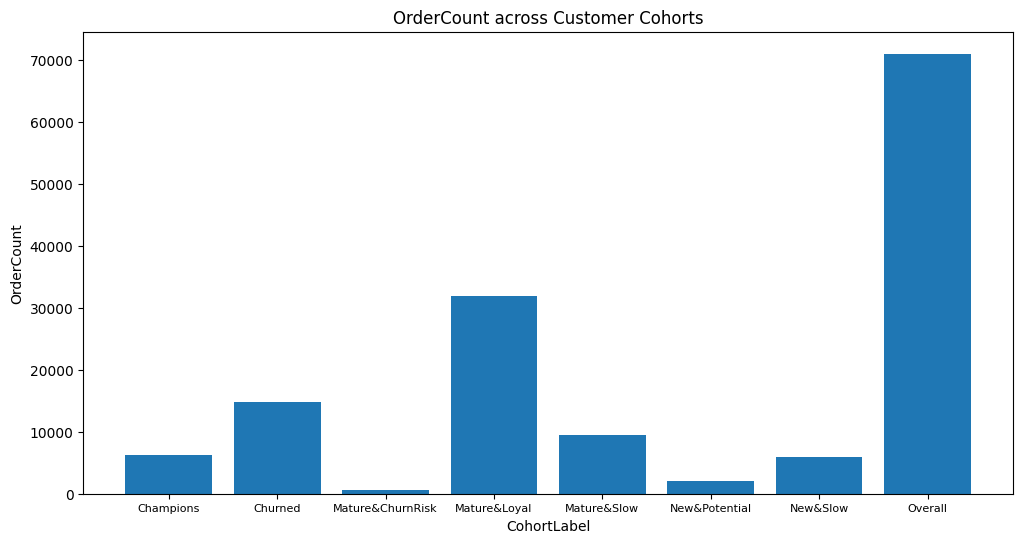

In [ ]:
column_to_plot = 'OrderCount'
x_labels = segstats['CohortLabel']
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(x_labels, segstats[column_to_plot])
plt.xlabel('CohortLabel')
plt.ylabel(column_to_plot)
plt.title(f'{column_to_plot} across Customer Cohorts')
plt.xticks(fontsize=8)
plt.show()